In [1]:
import pandas as pd
import matplotlib.pyplot as plt

A partir da exploração define que irei usar os seguintes arquivos como dataset
* arquivo de teste = Test3classes.csv
* arquivo de treino = Train3Classes.csv

Escolhi esses arquivos para termos um problema multiclasse.
* 0 = sentimento NEGATIVO
* 1 = sentimento POSITIVO
* 2 = sentimento NEUTRO


In [2]:
test  = pd.read_csv('../portuguese-tweets-for-sentiment-analysis/testdatasets/Test3classes.csv',delimiter=';')
train = pd.read_csv('../portuguese-tweets-for-sentiment-analysis/trainingdatasets/Train3Classes.csv',delimiter=';')

In [3]:
test.sample(5)

,id,tweet_text,tweet_date,sentiment,query_used
501,1029547002512781312,@KOOKJMIN_ @d001d00n4 Observação pra menina qu...,Wed Aug 15 01:55:08 +0000 2018,1,:)
2846,1030509719700598785,a camila é um anjo :(,Fri Aug 17 17:40:37 +0000 2018,0,:(
4131,1023976520484708353,Niterói promove maratona de tecnologia em busc...,Mon Jul 30 17:00:01 +0000 2018,2,jornaloglobo
4860,1025043545823031302,Ciro diz que nomeava mulheres antes do feminis...,Thu Aug 02 15:40:00 +0000 2018,2,jornaloglobo
1055,1029559076815097856,SUPER INDICO!!! GRANDE PROFISSIONAL :) https:/...,Wed Aug 15 02:43:06 +0000 2018,1,:)


In [4]:
train.sample(5)

,id,tweet_text,tweet_date,sentiment,query_used
30730,1045380826723168256,@anaflavia_st @beatriz_flr Isso @beatriz_flr a...,Thu Sep 27 18:33:05 +0000 2018,1,:)
86076,1037846919974936576,Brasil deve receber mais de R$ 1 tri em invest...,Thu Sep 06 23:36:02 +0000 2018,2,folha
17301,1047388680971857920,foo :-) : 75b34b3c-a359-422b-a2e9-3e241770b390,Wed Oct 03 07:31:35 +0000 2018,1,:)
3498,1049305127218233345,@daisymaramelo @blz_ah @primaverizei @Leofeal1...,Mon Oct 08 14:26:52 +0000 2018,1,:)
99486,1031165932482293760,"@KatiaAbreu Vou votar no Ciro,mas lamento prof...",Sun Aug 19 13:08:11 +0000 2018,2,#fato


In [5]:
test.drop_duplicates(subset='id', keep = False, inplace = True)
train.drop_duplicates(subset='id', keep = False, inplace = True)

In [6]:
test.drop(columns = ["id" ,"tweet_date"], axis = 1 , inplace = True)
train.drop(columns = ["id" , "tweet_date"], axis = 1 , inplace = True)

In [7]:
print(test.sentiment.value_counts())
print(train.sentiment.value_counts())

1    1667
2    1666
0    1666
Name: sentiment, dtype: int64
1    33333
0    33333
2    33306
Name: sentiment, dtype: int64


### Cria a primeira WordCloud

In [8]:
# fixa a imagem no notebook
%matplotlib inline


tweets_positivos = pd.concat([train.query('sentiment == 1'), test.query('sentiment == 1')], ignore_index=True)
tweets_negativos = pd.concat([train.query('sentiment == 0'), test.query('sentiment == 0')], ignore_index=True)
tweets_neutros   = pd.concat([train.query('sentiment == 2'), test.query('sentiment == 2')], ignore_index=True)

#### WordCloud dos tweets positivos

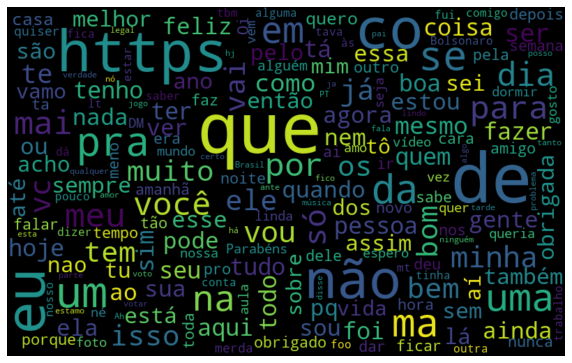

In [9]:
from wordcloud import WordCloud

text = [str(text) for text in tweets_positivos.tweet_text]

# um texto enorme, com todas as resenhas
all_ = ' '.join(text)
cloud_words = WordCloud(
    width = 800 , height = 500 , 
           max_font_size = 100,
                       collocations = False).generate(all_)


plt.figure(figsize = (10,8))
plt.imshow(cloud_words , interpolation = 'bilinear')
plt.axis("off")
plt.show()

#### WordCloud dos tweets negativos

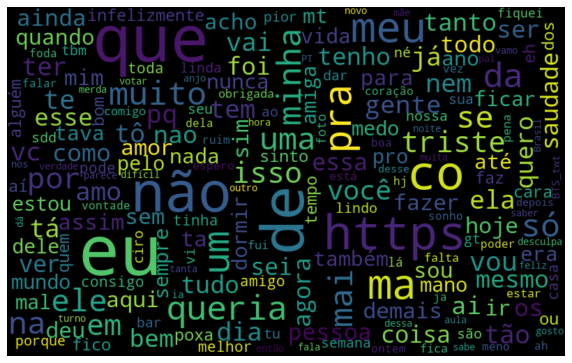

In [10]:
from wordcloud import WordCloud

text = [str(text) for text in tweets_negativos.tweet_text]

all_ = ''
all_ = ' '.join(text)
cloud_words = WordCloud(
    width = 800 , height = 500 , 
           max_font_size = 100,
                       collocations = False).generate(all_)


plt.figure(figsize = (10,8))
plt.imshow(cloud_words , interpolation = 'bilinear')
plt.axis("off")
plt.show()

#### WordCloud dos tweets neutros

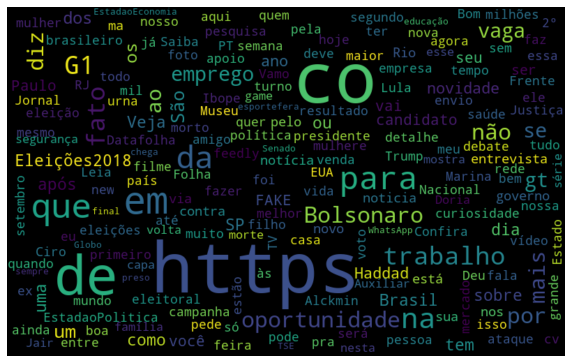

In [11]:
from wordcloud import WordCloud

text = [str(text) for text in tweets_neutros.tweet_text]

all_ = ''
all_ = ' '.join(text)
cloud_words = WordCloud(
    width = 800 , height = 500 , 
           max_font_size = 100,
                       collocations = False).generate(all_)


plt.figure(figsize = (10,8))
plt.imshow(cloud_words , interpolation = 'bilinear')
plt.axis("off")
plt.show()

#### A partir do WordCloud é possível notar que existem muitas palavras que não remetem diretamente ao sentimento associado